In [1]:
import sys
sys.path.append("../scripts/")
from robot import *
from scipy.stats import norm, chi2

In [4]:
def num(epsilon, delta, binnum):
    return math.ceil(chi2.ppf(1.0 - delta, binnum - 1)/(2*epsilon))

<IPython.core.display.Javascript object>


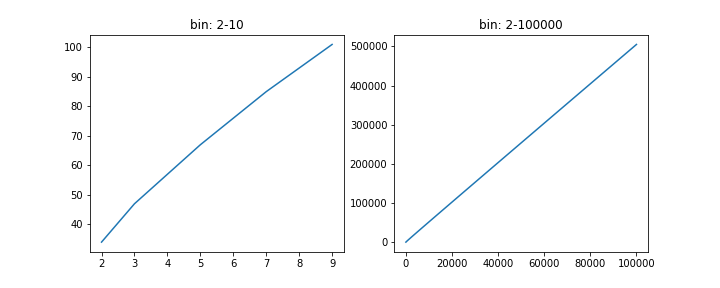

In [5]:
fig, (axl, axr) = plt.subplots(ncols=2, figsize=(10, 4))

bs = np.arange(2, 10)
n = [num(0.1, 0.01, b) for b in bs]
axl.set_title("bin: 2-10")
axl.plot(bs, n)

bs = np.arange(2, 100000)
n = [num(0.1, 0.01, b) for b in bs]
axr.set_title("bin: 2-100000")
axr.plot(bs, n)

plt.show()

In [11]:
def num_wh(epsilon, delta, binnum):
    dof = binnum - 1
    z = norm.ppf(1.0 - delta)
    return math.ceil(dof/(2*epsilon)*(1.0 - 2.0/(9*dof) + math.sqrt(2.0/(9*dof))*z)**3)

In [12]:
for binnum in 2, 4, 8, 1000, 10000, 100000:
    print("bin: ", binnum, "epsilon=0.1, delta=0.01", num(0.1, 0.01, binnum), num_wh(0.1, 0.01, binnum))

bin:  2 epsilon=0.1, delta=0.01 34 33
bin:  4 epsilon=0.1, delta=0.01 57 57
bin:  8 epsilon=0.1, delta=0.01 93 93
bin:  1000 epsilon=0.1, delta=0.01 5530 5530
bin:  10000 epsilon=0.1, delta=0.01 51655 51655
bin:  100000 epsilon=0.1, delta=0.01 505212 505212
